In [1]:
import pandas as pd
import zipfile
extract_to_path = '/kaggle/working/'
zip_file_path = '/kaggle/input/spooky-author-identification/train.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
zip_file_path = '/kaggle/input/spooky-author-identification/test.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
zip_file_path = '/kaggle/input/spooky-author-identification/sample_submission.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

train = pd.read_csv('/kaggle/working/train.csv')
test = pd.read_csv('/kaggle/working/test.csv')
print('Number of rows in train dataset: ', train.shape[0])
print('Number of rows in test dataset: ', test.shape[0])

Number of rows in train dataset:  19579
Number of rows in test dataset:  8392


In [2]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
    x = train.author.map(z).unique(),
    y = train.author.value_counts().values,
    marker = dict(
        colorscale='Jet',
        color = train.author.value_counts().values
    ),
    text = 'Text entries attributed to Author'
)]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

In [5]:
all_words = train['text'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
    x = all_words.index.values[2:50],
    y = all_words.values[2:50],
    marker = dict(
        colorscale='Jet',
        color = all_words.values[2:100]
    ),
    text = 'Text counts'
)]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training data set'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

<Axes: title={'center': 'Target variable distribution'}>

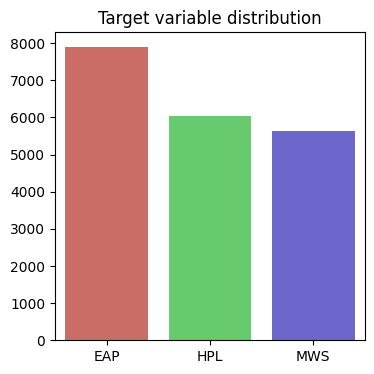

In [6]:
plt.figure(figsize=(4, 4))
plt.title('Target variable distribution')
sns.barplot(x = train.author.unique(), y = train.author.value_counts().values, palette='hls')

In [7]:
all_words

the          33296
of           20851
and          17059
to           12615
I            10382
             ...  
sunrise."        1
Averni;          1
buildin's        1
useless;         1
reduced?         1
Name: count, Length: 47556, dtype: int64

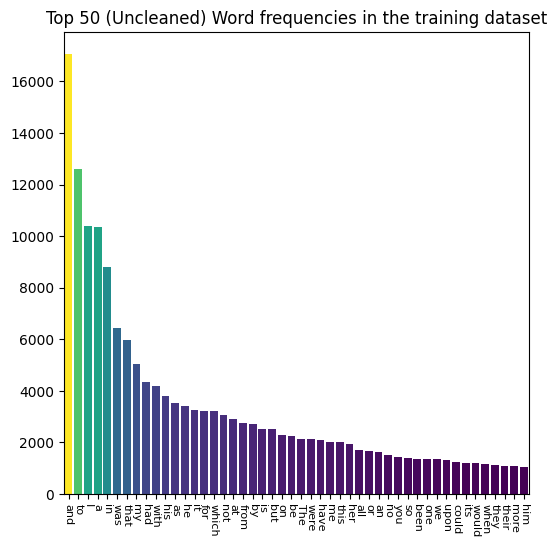

In [8]:
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=all_words.values[2:50].min(), vmax=all_words.values[2:50].max())
colors = [cmap(norm(value)) for value in all_words.values[2:50]]

plt.figure(figsize=(6, 6))
plt.title('Top 50 (Uncleaned) Word frequencies in the training dataset')
bars = sns.barplot(x = all_words.index.values[2:50],
           y = all_words.values[2:50])
for i, bar in enumerate(bars.patches):
    bar.set_facecolor(colors[i])
plt.xticks(rotation=270, fontsize=8)
plt.show()

In [9]:
eap = train[train.author=="EAP"]["text"].values
hpl = train[train.author=="HPL"]["text"].values
mws = train[train.author=="MWS"]["text"].values

In [10]:
len(eap), len(hpl), len(mws)

(7900, 5635, 6044)

In [11]:
from wordcloud import WordCloud, STOPWORDS

In [12]:
stopwords = set(STOPWORDS)
stopwords.add('upon')
stopwords.add('one')
stopwords.add('now')
stopwords.add('will')
stopwords.add('thing')
stopwords.add('said')

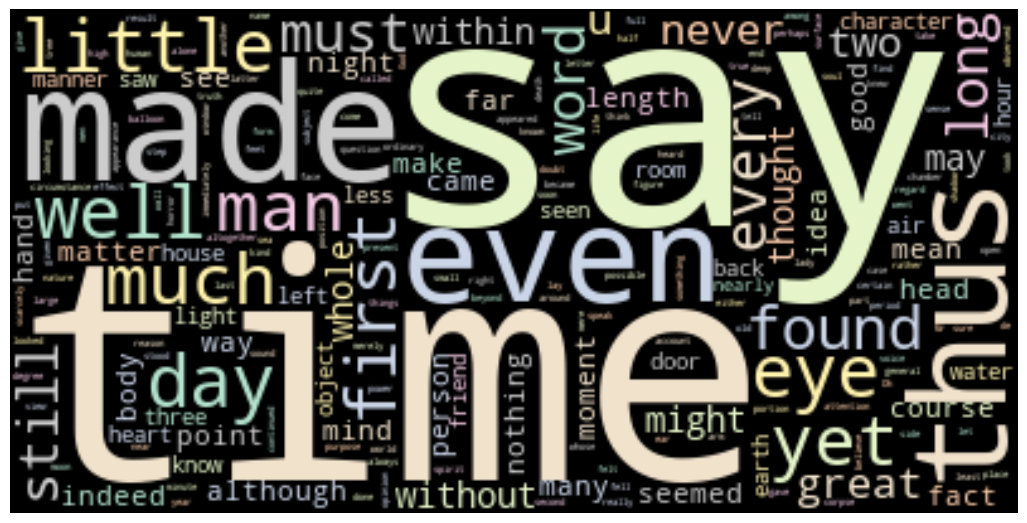

In [13]:
plt.figure(figsize=(13,13))
wc = WordCloud(max_words = 1000, collocations=True, stopwords=stopwords)
wc = wc.generate(''.join([sent for sent in eap]))
plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), interpolation='bilinear')
plt.axis('off')
plt.show()

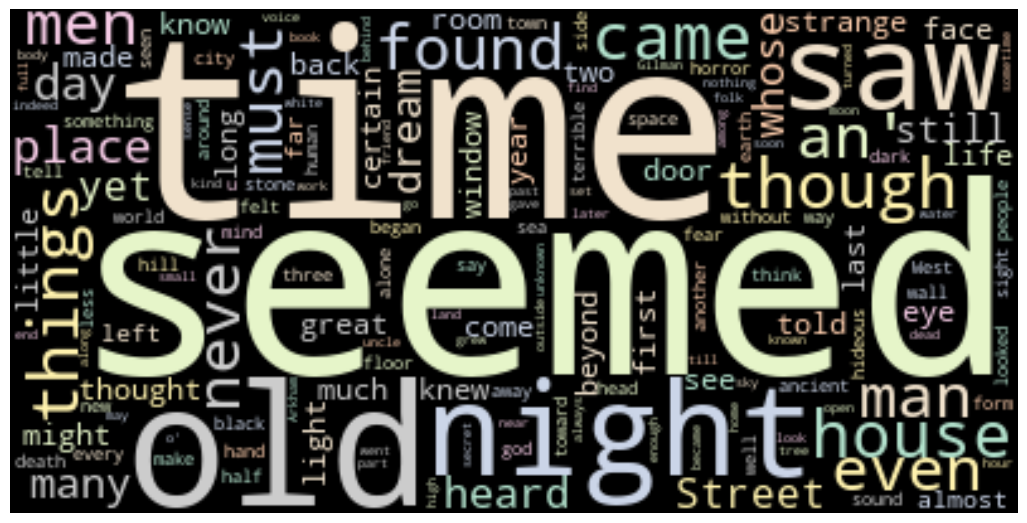

In [14]:
plt.figure(figsize=(13,13))
wc = WordCloud(max_words = 1000, collocations=True, stopwords=stopwords)
wc = wc.generate(''.join([sent for sent in hpl]))
plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), interpolation='bilinear')
plt.axis('off')
plt.show()

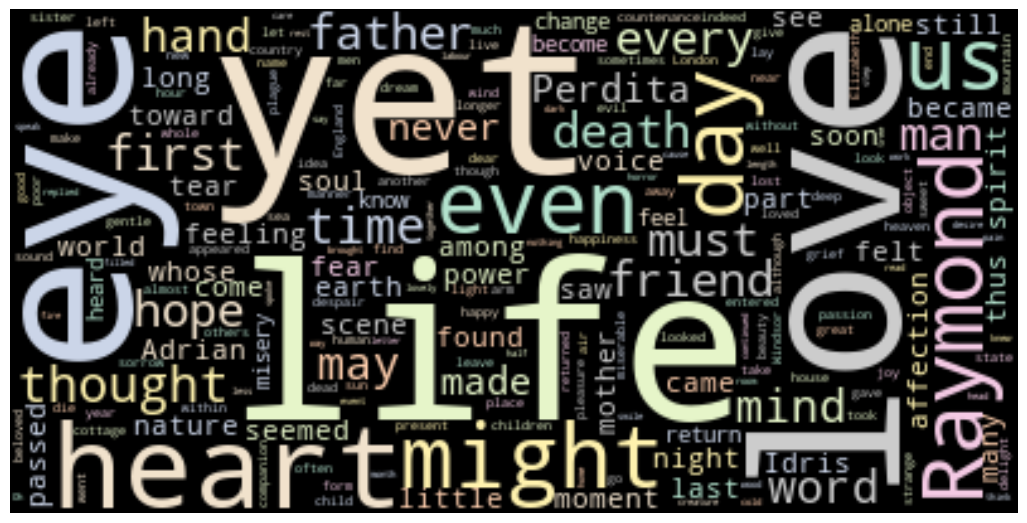

In [15]:
plt.figure(figsize=(13,13))
wc = WordCloud(max_words = 1000, collocations=True, stopwords=stopwords)
wc = wc.generate(''.join([sent for sent in mws]))
plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), interpolation='bilinear')
plt.axis('off')
plt.show()

## NLP
전처리 프로세스
1. Tokenization
2. Stopwords 제거
3. Stemming
4. Vectorization

In [16]:
import nltk

### Tokenization

가장 naive한 방법: split(" ") - 문장내에서 공백을 기준으로 분리하기
문제점: 구두점까지 포함해버린다.

개선 - `nltk.word_tokenize()` 메서드 사용

### Stopwords removal

불용어란 자연어에서 매우 자주 등장하는, 특별한 의미를 담고 있지 않는 단어들을 의미한다.
`nltk.corpus.stopwords.words('english')`는 영어의 불용어 179개를 제공한다.
문장이 text로 주어질 때
```python
text_cleaned = [word for word in text if word.lower() not in stopwords]
```
이런 식으로 불용어를 제거한 정제 텍스트를 얻을 수 있다.

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [18]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Stemming and Lemmatization

형태소 분석을 통해 어근 + 표제어를 추출한다.
when
문법적인 정보보다 의미론적 정보가 중요하다고 판단할 때

이점: 단어 사전의 크기를 줄임으로써 모델이 더 효과적으로 학습할 수 있다.

`nltk.stem`에서 어간 추출기들을 제공한다.

In [19]:
stemmer = nltk.stem.PorterStemmer()

In [20]:
stemmer.stem('running'), stemmer.stem('runs'), stemmer.stem('run')

('run', 'run', 'run')

**Stemming**과 **Lemmatization**은 모두 텍스트 전처리 과정에서 단어의 기본 형태를 추출하는 기법입니다. 그러나 둘 사이에는 중요한 차이점이 있습니다:

### 1. **Stemming (어간 추출)**:
- **목표**: 단어의 어간을 찾아내는 것.
- **작동 방식**: Stemming은 규칙 기반으로 접미사나 접두사를 제거하여 단어를 짧은 형태로 변환합니다. 이 과정은 종종 비정형적이고, 단어의 원래 형태와 다르게 변환될 수 있습니다.
- **예시**:
  - "running" → "run"
  - "happily" → "happi"
  - "better" → "better" (어간 추출이 불완전할 수 있음)
  
- **장점**: 빠르고 계산 비용이 적습니다.
- **단점**: 언어적 의미를 정확히 반영하지 못하고, 단어의 원래 형태와 다를 수 있습니다. 예를 들어, "better"는 "good"의 비교급인데, stemming 후 "better"가 그대로 남을 수 있습니다.

### 2. **Lemmatization (표제어 추출)**:
- **목표**: 단어의 기본형(표제어)을 찾아내는 것.
- **작동 방식**: Lemmatization은 더 정교한 과정으로, 단어의 품사(예: 동사, 명사 등)에 따라 정확한 기본형을 찾습니다. 언어학적 규칙에 기반을 두고 있으며, 사전 기반 방법을 사용하여 더 정밀하게 처리됩니다.
- **예시**:
  - "running" → "run"
  - "happily" → "happy"
  - "better" → "good"
  
- **장점**: 단어의 정확한 의미를 반영하고, 문법적으로 올바른 기본형을 반환합니다.
- **단점**: 더 많은 계산 자원이 필요하며, 시간이 더 걸릴 수 있습니다.

### 차이점 요약:
- **정확성**: Lemmatization이 더 정확하고 문법적으로 적합한 기본형을 제공합니다.
- **속도**: Stemming은 더 빠르고 간단한 알고리즘으로 수행됩니다.
- **의미 반영**: Lemmatization은 단어의 실제 의미를 반영하여 원형을 찾지만, Stemming은 규칙에 따라 어간을 잘라내는 방식입니다.

따라서 **Stemming**은 간단하고 빠르게 사용할 수 있지만 정확한 의미 분석이 필요한 경우 **Lemmatization**이 더 적합합니다.

In [21]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [38]:
nltk.download('wordnet', download_dir = '/usr/local/share/nltk_data')

[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
nltk.data.path.append('/usr/local/share/nltk_data')

In [39]:
stemmer.stem('leaves'), lemm.lemmatize('leaves')

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/usr/local/share/nltk_data'
**********************************************************************

### Vectorizing raw text

텍스트를 숫자 형태로 바꾸어주는 과정

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

1. CountVectorizer
   문서 내 단어들을 사전화 -> 모든 단어들을 개별의 feature들로 간주하여 벡터화
2. 

In [41]:
sentence = ["I love to eat Burgers", 
            "I love to eat Fries"]
vectorizer = CountVectorizer(min_df=0)
sentence_transform = vectorizer.fit_transform(sentence)

In [49]:
print("The features are:\n {}".format(vectorizer.vocabulary_.keys()))
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))

The features are:
 dict_keys(['love', 'to', 'eat', 'burgers', 'fries'])

The vectorized array looks like:
 [[1 1 0 1 1]
 [0 1 1 1 1]]


Q. 'I'가 들어가지 않은 이유? CountVectorizer가 자동으로 불용어 제거도 해 주는 것인가?

In [42]:
sentence_transform

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

결과가 '<Compressed Sparse Row sparse matrix of dtype 'int64''
&rarr; 대부분의 요소 값이 0인 희소 행렬

## Topic modeling